In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = np.loadtxt("data.csv", delimiter=",")

X = data[:, :2]
y = data[:, 2].astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Class 1 count:", np.sum(y == 1))
print("Class 0 count:", np.sum(y == 0))


def plot_data():
    c1 = (y == 1)
    c0 = (y == 0)
    plt.scatter(X[c1, 0], X[c1, 1], c="blue", label="Class 1")
    plt.scatter(X[c0, 0], X[c0, 1], c="orange", label="Class 0")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()


X shape: (100, 2)
y shape: (100,)
Class 1 count: 50
Class 0 count: 50


In [5]:
def plot_decision_line(w, b, color="k", style="-", label=None, alpha=1.0):
    x1_vals = np.linspace(0, 1, 100)

    if abs(w[1]) < 1e-6:
        x2_vals = np.linspace(0, 1, 2)
        x1_vals = np.full_like(x2_vals, -b / (w[0] + 1e-6))
    else:
        x2_vals = -(w[0] * x1_vals + b) / w[1]

    plt.plot(x1_vals, x2_vals, style, color=color, label=label, alpha=alpha)


In [6]:
def accuracy(w, b, X, y):
    activation = X @ w + b
    preds = (activation >= 0).astype(int)
    return np.mean(preds == y)


In [7]:
def perceptron_heuristic(X, y, learning_rate=0.1, max_epochs=50):
    n_samples, n_features = X.shape

    rng = np.random.default_rng(0)
    w = rng.uniform(-0.5, 0.5, size=n_features)
    b = rng.uniform(-0.5, 0.5)

    w_history = [w.copy()]
    b_history = [b]

    for epoch in range(max_epochs):
        errors = 0

        for i in range(n_samples):
            x_i = X[i]
            target = y[i]

            activation = np.dot(w, x_i) + b
            pred = 1 if activation >= 0 else 0

            if pred != target:
                if target == 1:
                    w += learning_rate * x_i
                    b += learning_rate
                else:
                    w -= learning_rate * x_i
                    b -= learning_rate
                errors += 1

        w_history.append(w.copy())
        b_history.append(b)

        if errors == 0:
            break

    return w, b, np.array(w_history), np.array(b_history)


Final weights: [-0.43887731 -0.80181219]
Final bias: 0.4409735239361947
Training accuracy: 0.74


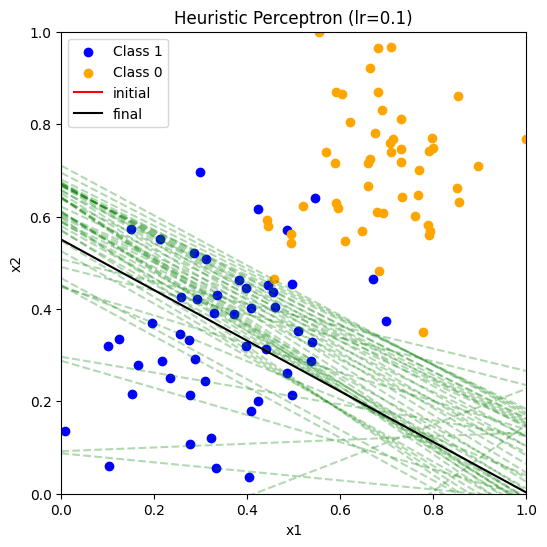

In [ ]:
lr = 0.1
epochs = 50

w_final, b_final, w_hist, b_hist = perceptron_heuristic(X, y, lr, epochs)

print("Final weights:", w_final)
print("Final bias:", b_final)
print("Training accuracy:", accuracy(w_final, b_final, X, y))


plt.figure(figsize=(6, 6))
plot_data()

plot_decision_line(w_hist[0], b_hist[0], color="red", style="-", label="initial")

for i in range(1, len(w_hist)-1):
    plot_decision_line(w_hist[i], b_hist[i], color="green", style="--", alpha=0.3)

plot_decision_line(w_hist[-1], b_hist[-1], color="black", style="-", label="final")

plt.title(f"Heuristic Perceptron (lr={lr})")
plt.legend()
plt.show()


In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(w, b, X, y):
    z = X @ w + b
    y_hat = sigmoid(z)
    eps = 1e-15
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


In [10]:
def perceptron_gradient_descent(X, y, learning_rate=0.1, max_epochs=100):
    n_samples, n_features = X.shape

    rng = np.random.default_rng(0)
    w = rng.uniform(-0.5, 0.5, size=n_features)
    b = rng.uniform(-0.5, 0.5)

    w_hist = [w.copy()]
    b_hist = [b]
    losses = []

    for epoch in range(max_epochs):
        for i in range(n_samples):
            x_i = X[i]
            target = y[i]

            z = np.dot(w, x_i) + b
            y_hat = sigmoid(z)

            error = target - y_hat
            w += learning_rate * error * x_i
            b += learning_rate * error

        w_hist.append(w.copy())
        b_hist.append(b)
        losses.append(log_loss(w, b, X, y))

    return w, b, np.array(w_hist), np.array(b_hist), np.array(losses)


Final weights (GD): [-7.85730962 -8.57453807]
Final bias: 8.110611765711175
Training accuracy: 0.93
Final log loss: 0.1789875896735804


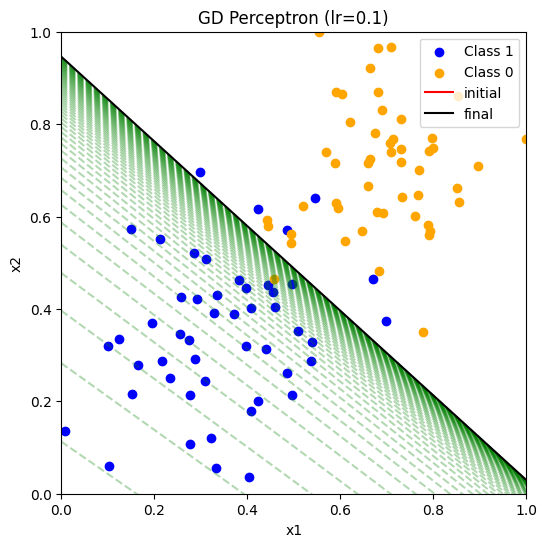

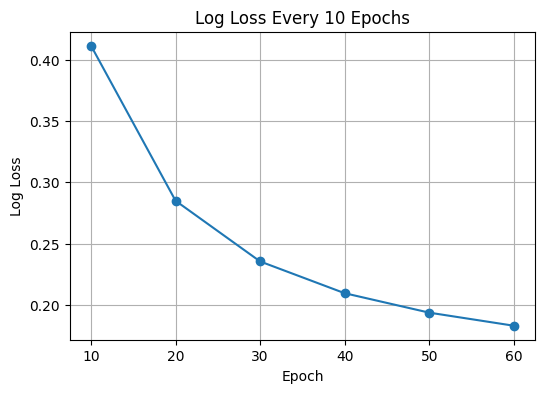

In [ ]:
lr_gd = 0.1
epochs_gd = 65

w_gd, b_gd, w_hist_gd, b_hist_gd, losses = perceptron_gradient_descent(
    X, y, learning_rate=lr_gd, max_epochs=epochs_gd
)

print("Final weights (GD):", w_gd)
print("Final bias:", b_gd)
print("Training accuracy:", accuracy(w_gd, b_gd, X, y))
print("Final log loss:", losses[-1])


plt.figure(figsize=(6, 6))
plot_data()

plot_decision_line(w_hist_gd[0], b_hist_gd[0], color="red", style="-", label="initial")

for i in range(1, len(w_hist_gd)-1):
    plot_decision_line(w_hist_gd[i], b_hist_gd[i], color="green", style="--", alpha=0.3)

plot_decision_line(w_hist_gd[-1], b_hist_gd[-1], color="black", style="-", label="final")

plt.title(f"GD Perceptron (lr={lr_gd})")
plt.legend()
plt.show()


plt.figure(figsize=(6, 4))
epochs_list = np.arange(1, epochs_gd + 1)
plt.plot(epochs_list[9::10], losses[9::10], marker="o")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.title("Log Loss Every 10 Epochs")
plt.grid(True)
plt.show()
